<a href="https://colab.research.google.com/github/tsengcc2023/Financial-Big-Data-Analysis/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

延用week3的股價資料，完成本次作業要求：
1. 使用Python建立ARIMA模型，預測股票價格，並進行可視化。
2. 使用Python設計一個量化交易策略，並使用歷史資料進行回測。

# 提取股價資料

In [1]:
import yfinance as yf
import pandas as pd

# 定義股票代碼和日期範圍
ticker = '2330.TW'
start_date = '2024-01-01'
end_date = '2024-06-03'

# 從Yahoo Finance下載股價資料
stock_data = yf.download(ticker, start=start_date, end=end_date)

# 檢查資料
print(stock_data.head())

# 保存數據到CSV
stock_data.to_csv('2330_stock_data.csv')

[*********************100%***********************]  1 of 1 completed

             Open   High    Low  Close   Adj Close    Volume
Date                                                        
2024-01-02  590.0  593.0  589.0  593.0  585.360962  26059058
2024-01-03  584.0  585.0  576.0  578.0  570.554199  37106763
2024-01-04  580.0  581.0  577.0  580.0  572.528442  15309129
2024-01-05  578.0  580.0  574.0  576.0  568.579956  18158971
2024-01-08  582.0  585.0  579.0  583.0  575.489746  17761275


In [2]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,590.0,593.0,589.0,593.0,585.360962,26059058
2024-01-03,584.0,585.0,576.0,578.0,570.554199,37106763
2024-01-04,580.0,581.0,577.0,580.0,572.528442,15309129
2024-01-05,578.0,580.0,574.0,576.0,568.579956,18158971
2024-01-08,582.0,585.0,579.0,583.0,575.489746,17761275
...,...,...,...,...,...,...
2024-05-27,872.0,878.0,866.0,869.0,861.811035,26726954
2024-05-28,867.0,873.0,865.0,865.0,857.844116,25329216
2024-05-29,861.0,868.0,856.0,857.0,849.910278,33436835


# 劃分訓練集和測試集

In [8]:
# 提取收盤價數據
close_prices = stock_data['Close']

# 劃分訓練集和測試集 (80% 用於訓練, 20% 用於測試)
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

# 檢查訓練集和測試集大小
print(f"Training data size: {train_data.shape}")
print(f"Test data size: {test_data.shape}")

Training data size: (78,)
Test data size: (20,)


# 1️⃣ 使用Python建立ARIMA模型，預測股票價格，並進行可視化。

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   78
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -316.419
Date:                Sun, 20 Oct 2024   AIC                            648.837
Time:                        16:59:47   BIC                            667.588
Sample:                             0   HQIC                           656.337
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0549      0.209     -0.263      0.793      -0.464       0.354
ar.L2         -1.0458      0.192     -5.452      0.000      -1.422      -0.670
ar.L3          0.0354      0.214      0.165      0.8

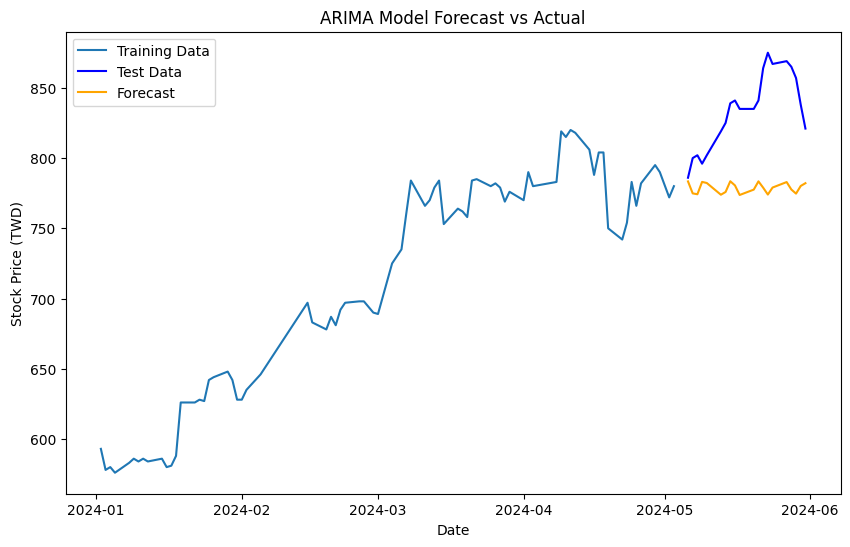

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 使用訓練集進行ARIMA建模 (p, d, q)
model = ARIMA(train_data, order=(5,1,2))  # 這裡的(p, d, q)可根據AIC/BIC進行調整
model_fit = model.fit()

# 打印模型摘要
print(model_fit.summary())

# 使用模型預測測試集的值
forecast = model_fit.forecast(steps=len(test_data))

# 可視化實際值與預測值
plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='blue')
plt.plot(test_data.index, forecast, label='Forecast', color='orange')
plt.title('ARIMA Model Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price (TWD)')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 計算MSE和MAE
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 3768.568834247069
Mean Absolute Error (MAE): 55.06108881647617


# 2️⃣ 使用Python設計一個量化交易策略，並使用歷史資料進行回測。

## 量化交易策略

<ipython-input-11-1959aa140677>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['Signal'][20:] = np.where(stock_data['SMA_20'][20:] > stock_data['SMA_50'][20:], 1, -1)
<ipython-input-11-1959aa140677>:7: SettingWithCopyWarning: 
A

            Close  SMA_20  SMA_50  Signal  Position
Date                                               
2024-05-27  869.0  821.65  797.66       1       1.0
2024-05-28  865.0  825.15  799.28       1       1.0
2024-05-29  857.0  828.50  801.36       1       1.0
2024-05-30  838.0  831.80  802.84       1       1.0
2024-05-31  821.0  833.85  804.02       1       1.0


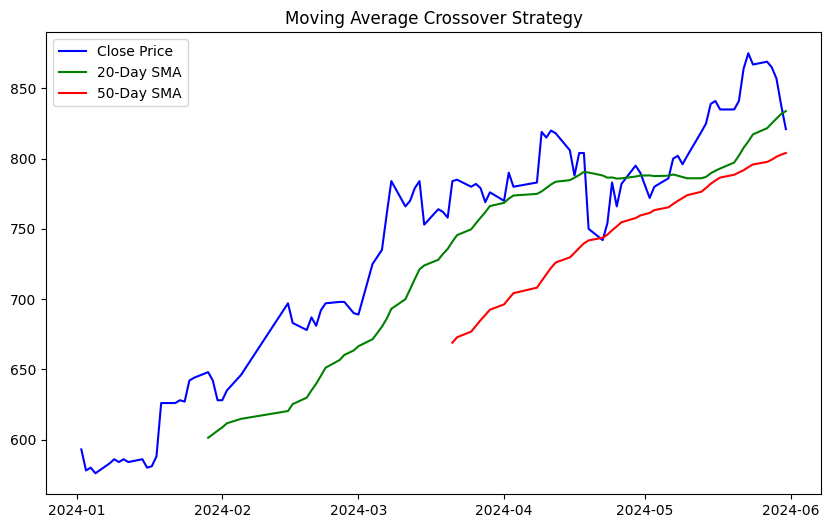

In [11]:
# 計算短期和長期移動平均線
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

# 設計交易信號: 短期均線 > 長期均線: 買入信號，反之賣出信號
stock_data['Signal'] = 0
stock_data['Signal'][20:] = np.where(stock_data['SMA_20'][20:] > stock_data['SMA_50'][20:], 1, -1)

# 根據信號生成交易頭寸
stock_data['Position'] = stock_data['Signal'].shift()

# 檢查策略資料
print(stock_data[['Close', 'SMA_20', 'SMA_50', 'Signal', 'Position']].tail())

# 可視化策略
plt.figure(figsize=(10,6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(stock_data['SMA_50'], label='50-Day SMA', color='red')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

## 使用歷史資料進行回測

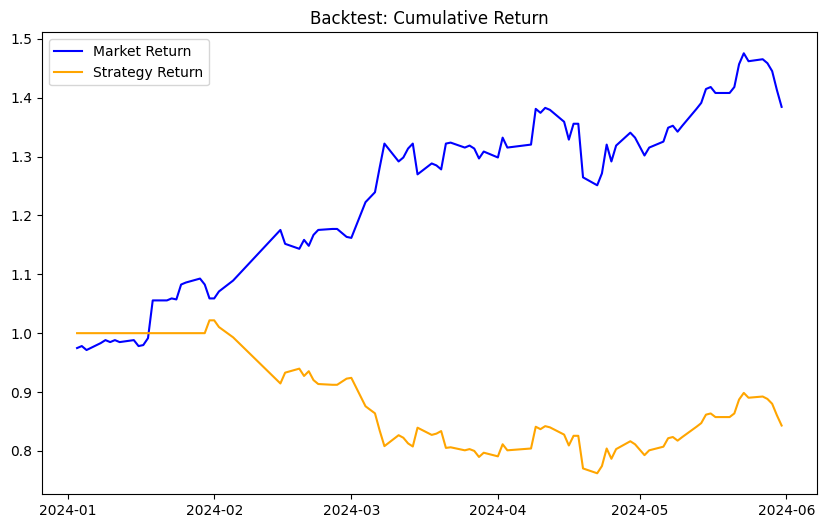

In [12]:
# 計算每日回報
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# 計算基於交易信號的策略回報
stock_data['Strategy Return'] = stock_data['Daily Return'] * stock_data['Position']

# 計算累積回報
stock_data['Cumulative Market Return'] = (1 + stock_data['Daily Return']).cumprod()
stock_data['Cumulative Strategy Return'] = (1 + stock_data['Strategy Return']).cumprod()

# 可視化累積回報
plt.figure(figsize=(10,6))
plt.plot(stock_data['Cumulative Market Return'], label='Market Return', color='blue')
plt.plot(stock_data['Cumulative Strategy Return'], label='Strategy Return', color='orange')
plt.title('Backtest: Cumulative Return')
plt.legend()
plt.show()